In [56]:
from scipy.io import wavfile # get the api
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
from scipy.signal.windows import tukey
import os

FFT_WINDOW_SECONDS = 1/4 # how many seconds of audio make up an FFT window
AUDIO_FILE = "content/billyjean.wav" # The file thas is parsed
SAMPLING_FREQUENCY, data = wavfile.read(AUDIO_FILE) # load the sampling rate and the audio data
audio = data.T[0] # this is a two channel soundtrack, get the first track
#audio= audio
windowsize=int(SAMPLING_FREQUENCY*FFT_WINDOW_SECONDS) # The number of sample in the window (FFT uses this parameter to build the window)
AUDIO_LENGTH = len(audio)/SAMPLING_FREQUENCY
FPS=50 # Nombre de frame par seconde pour l'analyse
HOP= int(SAMPLING_FREQUENCY/FPS) #Avancement en echantillon pour cahqe FFT

print("Frequence d'échantillonage",SAMPLING_FREQUENCY)
print("Nombre de sample",len(audio))

Frequence d'échantillonage 44100
Nombre de sample 13051006


In [57]:
from scipy.fft import fft, fftfreq
AVGMEAN_WINDOWSIZE=SAMPLING_FREQUENCY//20
totfft=np.zeros(len(audio))
audio1=audio.astype(float)
audio1=audio1/np.max(audio1)
audio1=audio1*audio1
convolute=np.sqrt(np.convolve(audio1,np.ones(AVGMEAN_WINDOWSIZE)/AVGMEAN_WINDOWSIZE,mode='same'))


In [51]:
x=[i/SAMPLING_FREQUENCY for i in range(len(audio1))]

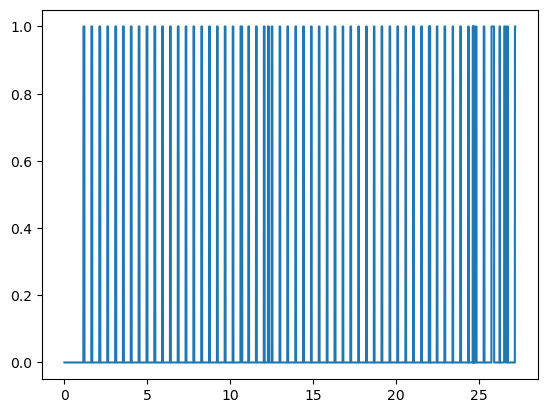

In [92]:
any(np.isnan(audio1))
diviseur=10
plt.plot(x[:len(convolute)//diviseur],convolute[:len(convolute)//diviseur])

In [59]:
convolute=convolute>.3

In [63]:
diffpatt=np.array([1,-1])
diff=np.convolve(convolute,diffpatt,mode="valid")


In [68]:
indexes=np.where(diff==1)

diffsp=np.convolve(indexes[0],diffpatt,mode="valid")


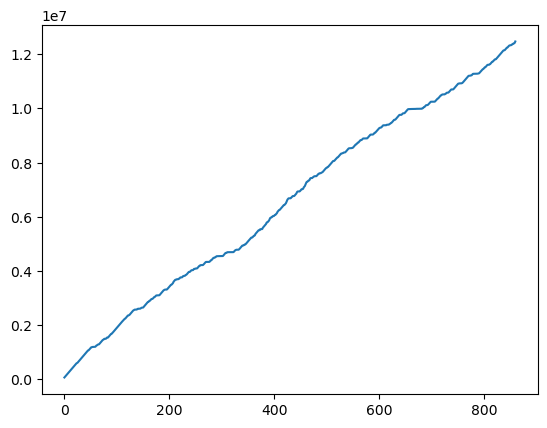

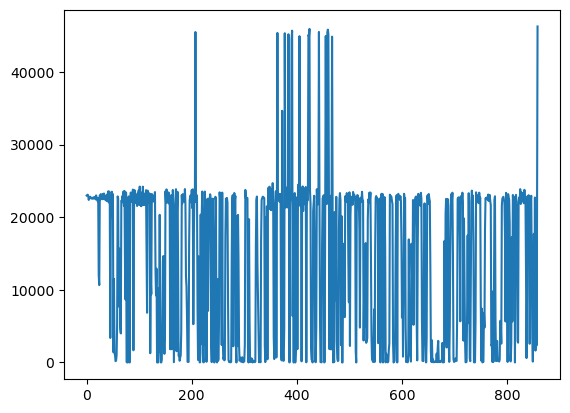

In [95]:
plt.plot(indexes[0])
plt.show()
plt.plot(np.convolve(indexes[0],diffpatt,mode="valid"))


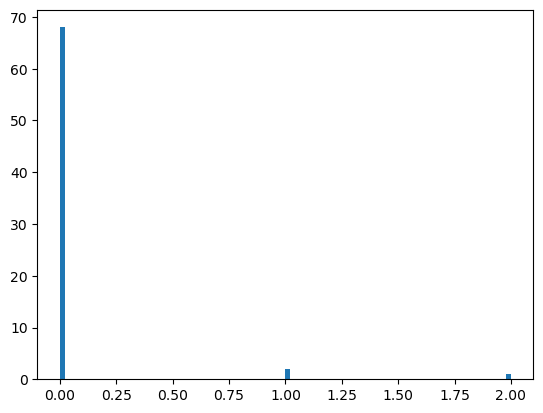

{'whiskers': [<matplotlib.lines.Line2D at 0x701c045e6110>,
 'caps': [<matplotlib.lines.Line2D at 0x701c045e72d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701c045e5a50>],
 'medians': [<matplotlib.lines.Line2D at 0x701c045f8550>],
 'fliers': [<matplotlib.lines.Line2D at 0x701c045f8f10>],
 'means': []}

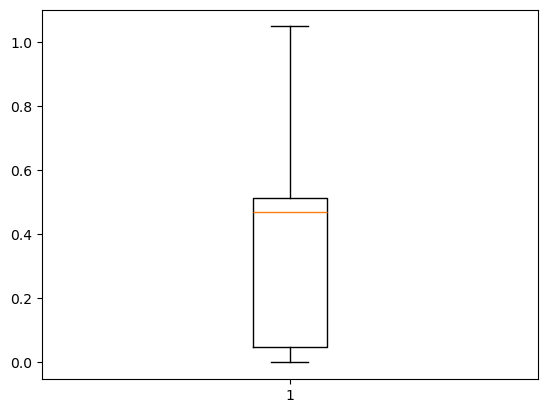

In [87]:
intervaleentrebeat=diffsp/SAMPLING_FREQUENCY
#bpm=60/intervaleentrebeat
hist=np.histogram(intervaleentrebeat,bins=100,range=(0,2))
plt.hist(hist[0],hist[1])
plt.show()
plt.boxplot(intervaleentrebeat)